In [1]:
import functionlib as fl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def payoff_barrier_option(path, K, T, B, observ_freq, option_type, barrier_effect, graph=False):
    """
    Computes the payoff of a barrier option given a price path. 
    Option type can be: upincall, upoutcall, upinput, upoutput, downincall, downoutcall, downinput, downoutput
    Observation are made every observ_freq days.
    """
   
    time_steps = T*252
    observation_dates = np.arrange(observ_freq, time_steps+1, observ_freq)

    path_at_observation = [path.iloc[observation-1] for observation in observation_dates]
    
    max_price = max(path_at_observation)
    min_price = min(path_at_observation)

    S_T = path.iloc[-1]

    payoff = 0

    if option_type == 'upincall':
        if max_price >= B: #Barrier reached, standard call payoff
            payoff = max(S_T-K, 0)
        
    elif option_type == 'upinput': #Barrier reached, standard put payoff
        if max_price >= B:
            payoff = max(K-S_T,0)
    
    elif option_type == 'downincall':
        if min_price <= B: #Barrier reached, standard call payoff
            payoff = max(S_T-K,0)

    elif option_type == 'downinput':
        if min_price <= B:
            payoff = max(K-S_T,0)
        
    """
    All Knock-In cases are treated, to compute the payoff for Knock-Out options,
    we use parity relationhip: KO + KI = Vanilla
    """

    if option_type == 'upoutcall':
        payoff = max(S_T-K) - payoff_barrier_option(path, K, T, B, observ_freq, option_type='upincall')
    
    elif option_type == 'upoutput':
        payoff = max(K-S_T) - payoff_barrier_option(path, K, T, B, observ_freq, option_type='upinput')
    
    elif option_type == 'downoutcall':
        payoff = max(S_T-K) - payoff_barrier_option(path, K, T, B, observ_freq, option_type='downincall')
    
    else:
        payoff = max(K-S_T) - payoff_barrier_option(path, K, T, B, observ_freq, option_type='downinput')
    


    if graph:
        plt.figure(figsize=(10,6))
        plt.plot(path)
        plt.axhline(y = B, color='r', linestyle='--')
        plt.text(0, B+0.2, 'BARRIER', color='r')
        plt.xlabel('Time (days)')
        plt.ylabel('Index level')
        plt.grid()
        plt.show()

    return payoff

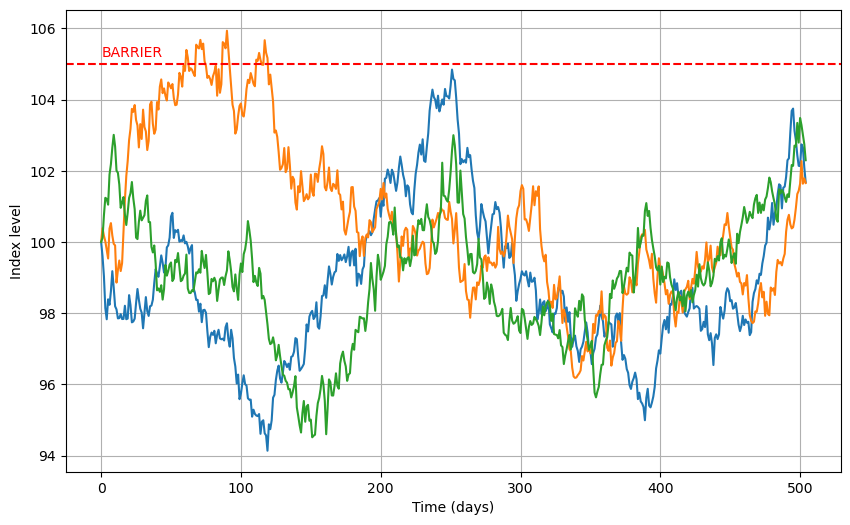

In [ ]:
S0 = 100
T = 2
r = 0.02
vol = 0.06
M = 3

B = 105

path = fl.monte_carlo(S0, T, r, vol, M, antithetic=False)
plt.figure(figsize=(10,6))
plt.plot(path)
plt.axhline(y = B, color='r', linestyle='--')
plt.text(0, B+0.2, 'BARRIER', color='r')
plt.xlabel('Time (days)')
plt.ylabel('Index level')
plt.grid()
plt.show()

In [25]:
path

,1,2,3
0,100.000000,100.000000,100.000000
1,99.597704,100.384922,100.114243
2,99.039432,100.172864,100.748371
3,98.142285,100.017825,101.238897
4,97.828365,99.768719,101.209973
...,...,...,...
248,104.086835,100.618416,101.131301
249,104.028324,101.124584,101.476105
250,104.385382,100.852301,101.966661
251,104.840388,100.648841,102.563052
